<a href="https://colab.research.google.com/github/Manvi1718/Pytorch/blob/main/PYTORCH_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PyTorch**

##What we are covering

* Data
* Build Model
* Fitting the model to data(training)
* Making predictions and evaluating model(inference)
* Saving and Loading a model
* Putting it all together

In [ ]:
import torch
from torch import nn # nn contains all of building blocks for neural networks
import matplotlib.pyplot as plt

# check pyroch version
torch.__version__

'2.0.1+cu118'

## 1 ) Data (preparing and loading)

Data can be almost anything ... in Machine learning
* Excel spreadsheet
* Images
* Vidoes
* Audio
* DNA
* Text

Machine leartning is a game of 2 parts

1) get data into numerical representation

2) build a model to learn patterns in that numerical representation

**To showcase this lets create some *known* data using the linear regression formula**

we will use a linear regression formula to make a straight line with known **parameters**


In [ ]:
# create *known* parameters

weight = 0.7 # b
bias = 0.3 # a

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight* X + bias
X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X) , len(y)

(50, 50)

###Splitting Data into training and testing sets (one of the most important concepts in machine learning in general)

lets create a training a test set with our data

In [ ]:
# create a train/test split
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split] # 1 to 40
X_test , y_test = X[train_split:] ,y[train_split:] # 40 to 50

len(X_train) ,len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

How might we better visualise our data?

This is where explorers motto comes in!

"Visualise , visualise , visualise1!

In [ ]:
def plot_predictions(train_data = X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label = y_test,
                     predictions=None):
  """
  plots training data , test data and compares predictions
  """
  plt.figure(figsize =(10,7))

  # plot training data in blue
  plt.scatter(train_data,train_label , c="k",s=4,label="training data")

  # plot the test data in green
  plt.scatter(test_data,test_label , c = "c" , s=5 ,label ="testing data")

  # are there predictions ?
  if predictions is not None:
    # plot the [redictions if they exist
    plt.scatter(test_data,predictions,c="r",s=7,label="predictions")

  # show the legend
  plt.legend(prop={"size":14});


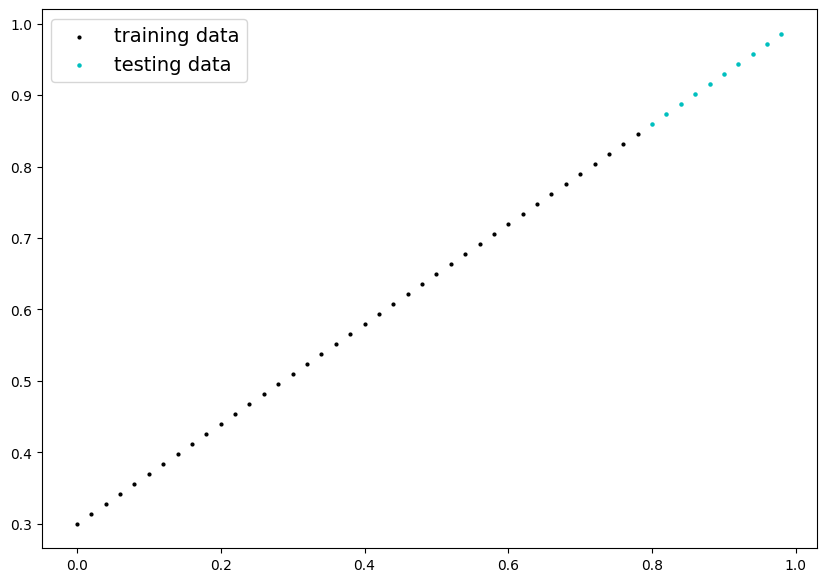

In [ ]:
plot_predictions()

##2) Build PyTorch model

Our first Pytorch model

This is very exciting lets do it

What our model does ⁉

* Start with random values (weight and bias )
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data )

How does it do so ?

1) Gradient descent

2) BackPropagation

In [ ]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in Pytorch inherites from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #<- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, #<- can this parameter be updated via gradient descent?
                                            dtype=torch.float)) #<- PyTorch loves the datatype torch.float32
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    # always override forward method
    # forward method to define the computation in the model
  def forward(self , x : torch.Tensor ) -> torch.Tensor : # <- "x" is the input data
    return self.weights * x + self.bias # linear regression formula


###PyTorch model building essentials

* `torch.nn` -> conatins all of the building blocks for computational graphs ( a neural network can be considered a computational graph)

* `torch.nn.Paramter` -> what paramters should our model try and learn ,often a pytorch layer from torch.nn will set these for us

* `Torch.nn.Module` -> the base class for all netwrok modules , if you subclass it you should override forward()

* `torch.optim` -> this is where optimisers in pytorch live , they will help in gradient descent

* `def forward()` -> all nn.Module subclasses require you to overwrite forward , this method defines what happens in forward computations

### Checking the contents of our Pytorch model

Now we have created a model , lets see what inside...

So we can check our model parameters or whats inside our model using `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# create an instance of our model ( this is a subclass of nn.Module )
model_0 = LinearRegressionModel()

# check out parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power , lets see how well it predict `y_test` based on `x_test`

When we pass data through our model , its going to run it through the `forward()` method

In [ ]:
X_test , y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# makae predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

#You can also do something similar with torch.no_grad() , however inference mode is preferred
#with torch.no_grad():
#  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

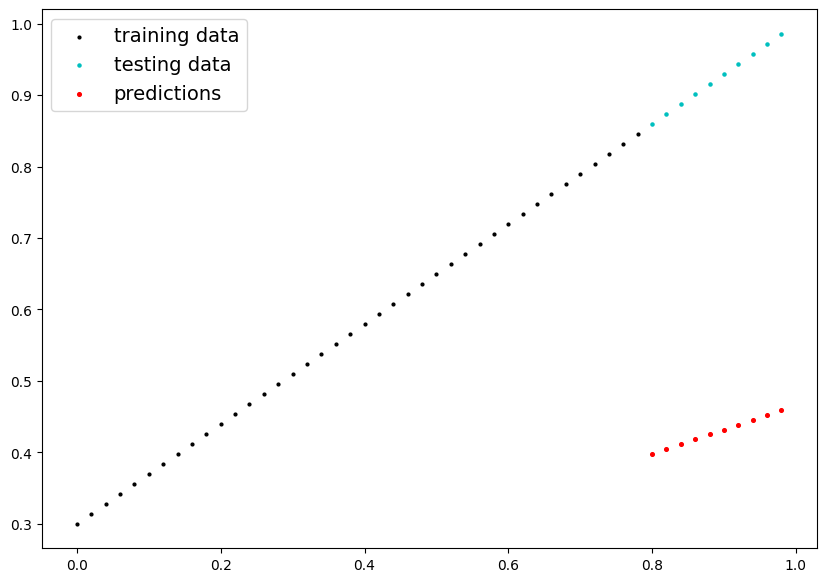

In [ ]:
plot_predictions(predictions = y_preds)

## 3) Training model

the whole idea of training if for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

In other words , from a poor representaion of a data  to a better representation of data .


One way to measure how poor or how wrong our predictions are is to use a loss function

* Note :Loss function may also be called cost function or criterion in different areas . For our case , we are going to refer to it as a loss function.

Things we need to train :

* **Loss Function:** A function to measure how wrong our model predictions are to ideal the ideal outputs , lower is better .
* **Optimiser:** Takes into account of loss of a model and adjust the model's parameters(e.g. weights and bias ) to improve the loss function .

  Inside the optimiser you will have to set 2 parameters
**  `params` - the model parameters that we like to optimize , for example `params = model_0.parameters()`
** `lr`(learning rate ) - the lr is the hyper parameter that defines how big/ small the optimiser changes the parameters with each step(a small `lr` results in small changes , a large `lr` results in large changes)

And for specifically for pytorch , we need :
 * A training loop
 * A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# checking our model parameters( a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# setup an optimiser
optimizer = torch.optim.SGD(params = model_0.parameters() ,
                            lr = 0.01) # lr = learning rate = possibly the most important hyper parameter you can set

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data and do
1. forward pass ( this involves data moving through our model's `forward()` function to make predictions on data  - also called forward propagation
2. Calculate the loss (comapre forward pass predictions to ground truth labels)
3. Optimiser zero grad
4. Loss backward - move backwards through network to calculate the gradients of each of the parameters of our model with respect to the loss (**Backpropagation**)
5. Optimizer - use the optmizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [ ]:
torch.manual_seed(42)

# An epoch is 1 loop through the data ...
epochs = 200

#Track different values
epoch_count =[]
loss_values=[]
test_loss_values=[]

### Training
# 0. loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train()  # train mode in PyTorch sets all parameters that require gradient to require gradient

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred,y_train)

  # 3 . Optimizer zero grad
  optimizer.zero_grad()

  # 4 . perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5 . Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes through the loop so ... we have to zero them above in step 3 for next iteration of the loop

  ###Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/natch norm layers)
  with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scences
    # 1 . forward pass
    test_pred = model_0(X_test)

    # 2 . calculate the loss
    test_loss = loss_fn(test_pred,y_test)

  # print out whats happening
  if(epoch%10==0):
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch : {epoch} | Loss : {loss} | Test Loss :{test_loss}")
    # print our model state_dict()
    print(model_0.state_dict())

Epoch : 0 | Loss : 0.31288138031959534 | Test Loss :0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 10 | Loss : 0.1976713240146637 | Test Loss :0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch : 20 | Loss : 0.08908725529909134 | Test Loss :0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch : 30 | Loss : 0.053148526698350906 | Test Loss :0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch : 40 | Loss : 0.04543796554207802 | Test Loss :0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch : 50 | Loss : 0.04167863354086876 | Test Loss :0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch : 60 | Loss : 0.03818932920694351 | Test Loss :0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', 

In [ ]:
import numpy as np

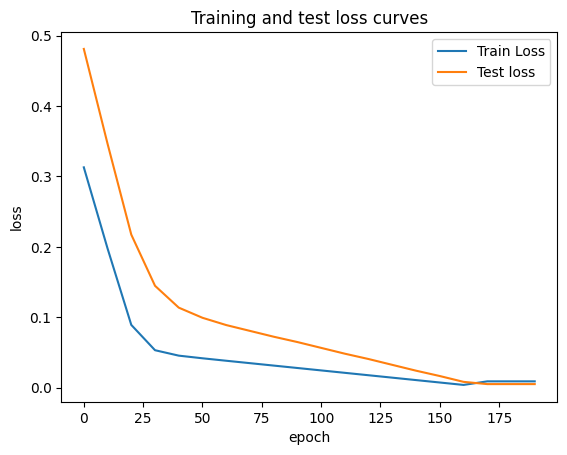

In [ ]:
# plot the loss curves
plt.plot(epoch_count , np.array(torch.tensor(loss_values).numpy()) , label="Train Loss")
plt.plot(epoch_count,test_loss_values , label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend();

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

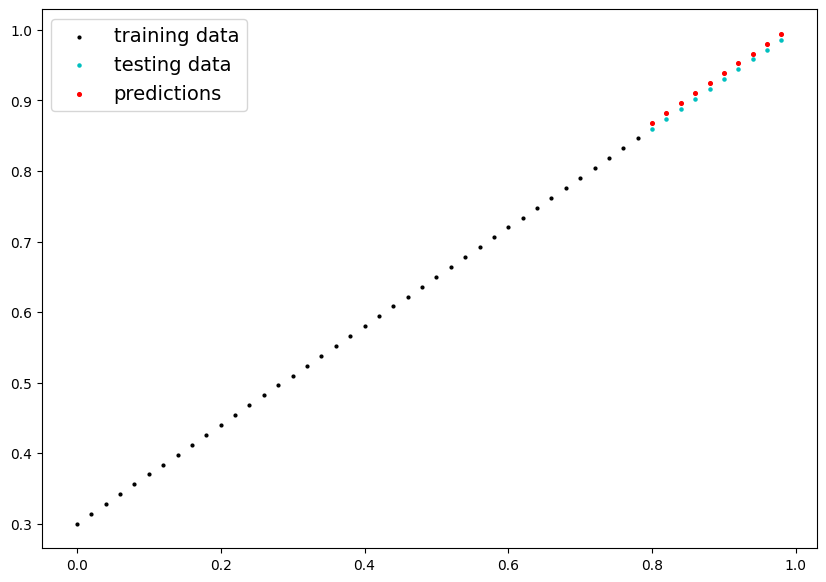

In [ ]:
plot_predictions(predictions=y_preds_new);

## 4)Saving a model in PyTorch

there are 3 main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()`- allows you to save a PyTorch object in Pythons's pickle format.

2. `torch.load()` - allows you to load a saved PyTorch object.

3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1 . Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True , exist_ok=True)

# 2 . Create model save path
MODEL_NAME = "01_pytorchWorkflow_model_0.pth"

MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3 . save the model state dict
print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f =MODEL_SAVE_PATH)

saving model to : models/01_pytorchWorkflow_model_0.pth


In [ ]:
ls -l models

total 4
-rw-r--r-- 1 root root 1203 Aug 16 06:25 01_pytorchWorkflow_model_0.pth


## 5)Loading a PyTorch model

since we saved our model's `state_dict()` rather the entire model , we will create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# comapre the loaded model with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6 ) Putting it all together

lets go back through the steps above and see it all in one place

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# chacek pytorch version
torch.__version__

'2.0.1+cu118'

create device - agnostic code .

this means if we got access to GPU , our code will use it (for faster computing).

if no GPU is available , the code will default to using CPU

In [ ]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device : {device}")

using device : cpu


### 6.1 ) DATA



In [ ]:
# create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create x and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8*len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]
len(X_train) ,len(y_train) ,len(X_test) ,len(y_test)

(40, 40, 10, 10)

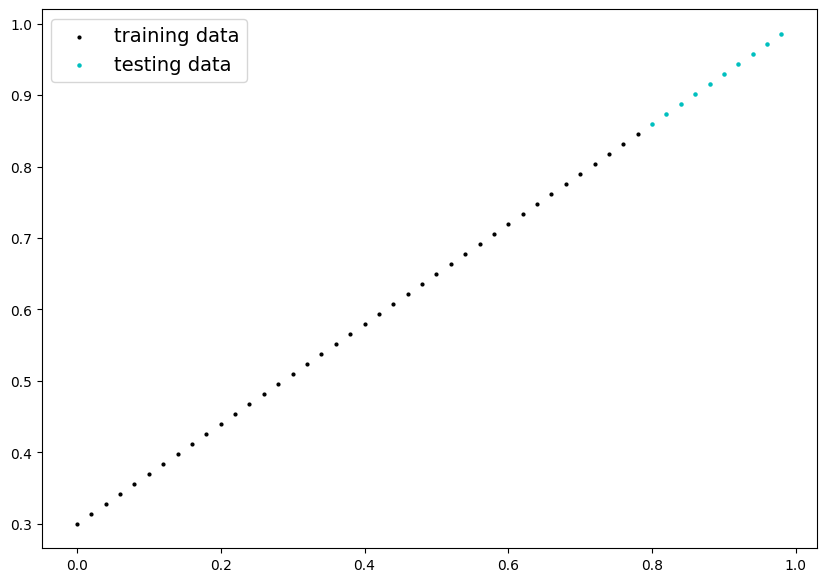

In [ ]:
# Plot the data
# Note : if you dont have plot_predictions() function loaded , this will error
plot_predictions(X_train,y_train,X_test,y_test)

### 6.2) Building a PyTorch Linear Model

In [ ]:
# create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating model parameters/ also called linear transform , probing layer , fully connected layer . dense layer
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features=1)

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)
model_1= LinearRegressionModelV2()
model_1

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3) Training

for training we need :
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# setup loss function
loss_fn = nn.L1Loss() # same as MAE

# set up optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr =0.01)

In [ ]:
# lets write a training loop
torch.manual_seed(42)

epochs = 200

# put data on target device(device agnostic code for data)
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred,y_train)

  # 3. Optmizer zero grad
  optimizer.zero_grad()

  # 4. perform back propagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)

  # print whats happening
  if(epoch % 10==0):
    print(f"Epoch : {epoch} | Loss : {loss} | Test Loss : {test_loss}")



Epoch : 0 | Loss : 0.5551779866218567 | Test Loss : 0.5739762187004089
Epoch : 10 | Loss : 0.4399680495262146 | Test Loss : 0.4392663538455963
Epoch : 20 | Loss : 0.3247582018375397 | Test Loss : 0.30455657839775085
Epoch : 30 | Loss : 0.20954827964305878 | Test Loss : 0.16984674334526062
Epoch : 40 | Loss : 0.09433844685554504 | Test Loss : 0.03513689711689949
Epoch : 50 | Loss : 0.023886386305093765 | Test Loss : 0.04784906655550003
Epoch : 60 | Loss : 0.0199567973613739 | Test Loss : 0.04580312222242355
Epoch : 70 | Loss : 0.016517987474799156 | Test Loss : 0.0375305712223053
Epoch : 80 | Loss : 0.013089170679450035 | Test Loss : 0.029944902285933495
Epoch : 90 | Loss : 0.009653178043663502 | Test Loss : 0.02167237363755703
Epoch : 100 | Loss : 0.006215679459273815 | Test Loss : 0.014086711220443249
Epoch : 110 | Loss : 0.002787243574857712 | Test Loss : 0.005814164876937866
Epoch : 120 | Loss : 0.0012645035749301314 | Test Loss : 0.013801807537674904
Epoch : 130 | Loss : 0.00126450

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

### 6.4 ) Making and Evaluating Predictions

In [ ]:
# turn model into evaluation mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

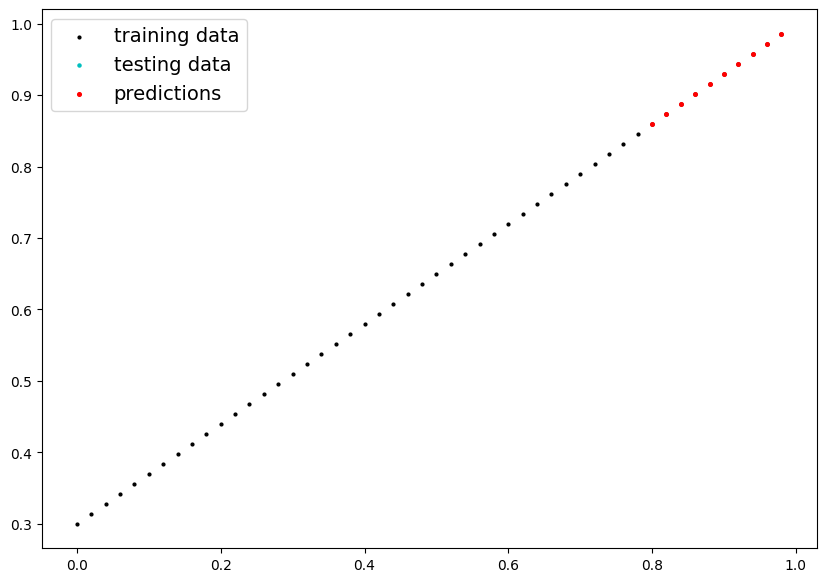

In [ ]:
# Check out our model predictions
plot_predictions(predictions = y_preds)

### 6.5) Saving and loading a trained model

In [ ]:
from pathlib import Path

#1 . create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2 . create model save path
MODEL_NAME = "01_PyTorch_Workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH
print(f"saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to :models/01_PyTorch_Workflow_model_1.pth


In [ ]:
# Load a PyTorch model

# create a new instance of our model
loaded_model_1 = LinearRegressionModelV2()

# Load the model's saved state_dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
# evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])